In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
np.random.seed(0)


In [4]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9)


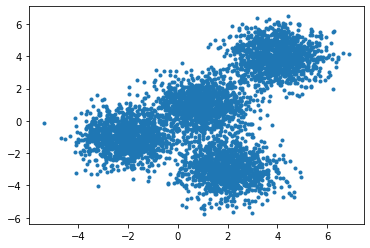

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')


In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)


In [7]:
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

In [8]:
k_means_labels = k_means.labels_
k_means_labels


array([0, 3, 3, ..., 1, 0, 0])

In [9]:

k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

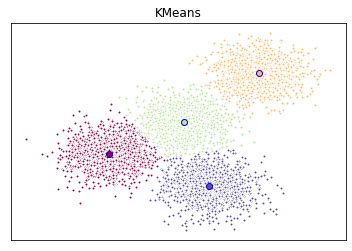

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))
# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set﴾k_means_labels﴿ to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
# Create a plot
ax = fig.add_subplot(1, 1, 1)
# For loop that plots the data points and centroids.
# k will range from 0‑3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data poitns that are
    # in the cluster ﴾ex. cluster 0﴿ are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='blue')
# Title of the plot
ax.set_title('KMeans')
# Remove x‑axis ticks
ax.set_xticks(())
# Remove y‑axis ticks
ax.set_yticks(())
# Show the plot
plt.show()

In [13]:
import pandas as pd
cust_df = pd.read_csv("Z\3 курс\IS&T2024\Пр№7\Cust_Segmentation.csv")
cust_df.head()

OSError: [Errno 22] Invalid argument: 'Z\x03 курс\\IS&T2024\\Пр№7\\Cust_Segmentation.csv'

In [ ]:
df = cust_df.drop('Address', axis=1)
df.head()

In [ ]:

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


In [ ]:
clusterNum = 3
k_means = KMeans(init = "k‑means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


In [ ]:
df["Clus_km"] = labels
df.head(5)


In [ ]:
df.groupby('Clus_km').mean()


In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
# plt.ylabel﴾'Age', fontsize=18﴿
# plt.xlabel﴾'Income', fontsize=16﴿
# plt.zlabel﴾'Education', fontsize=16﴿
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))
